### If these turning epochs do not move with our will today,
### The spheres of time are not constant, do not grieve

### Hafiz

<img src="sinewave.jpg" alt="Alternative text" />

In [67]:
import numpy as np
import scipy as sc
import pandas as pd
import typing as tp
import matplotlib.pyplot as plt
import random

# 1 Linear Regression from Scratch

### 1.1. Simple Regression Model
The most implementation that is done from scratch are based on the following book.

*Grus, J. (2015). Data science from scratch: first principles with Python. First edition. Sebastopol, CA, O'Reilly.*

The basic formulation of the linear regression is based on the intercept ($w_0$) and slope ($w_1$).

$$y=w_0+w_1$$

So, if we know the intercept and the slope, for every new data we can find the value of $y$ (Prediction).


In [68]:
"""
1. The float in parentheses shows the input type is float.
2. -> float: It shows the output is of type float
"""
def predict(w0: float, w1:float, x:float) -> float:
    return w0+w1*x

### 1.2. Multiple Regression

Now, you should ask what if we had more variables that define my model?

The answer is easy :) Just consider it as a vector and all multiplication that we have become like the element-wise vector multiplication.

$$y_i = w_0 + w_1*x_{i1} + w_2*x_{i2} + ... + w_n*x_{in}$$
$$ y = w^Tx$$

In [69]:
# Simple Implementation
def predict(w:tp.List[float], x:tp.List[float]) -> tp.List[float]:
    return w.T*x

# A better implementation in the following link
# https://github.com/oilneck/prml_python/blob/master/prml/fitting/bayesian_regression.py

### 1.3. Least Square Estimation (Training Process)

Lets see how we utilize the least square in our implementation!

$$L(w)=\frac{1}{2}||y-xw||^2_{2}$$

Also, the quadratic format is:

$$L(w)=\frac{1}{2}(Xw-y)^T(Xw-y)$$

We have to find the gradient of the $L(w)$ to find the weights.

$$\nabla L(w) = 0$$

For finding the gradient we need to use some algorithms to find the roots of our required weights. There are different ways like Bisection method but here the best option is "Gradient Descent" algorithm.

A Brief Review on the Gradient Descent Algorithm: 

Step 1 : make an initial guess
Step 2 (general formulation):  $x_{i+1} = x_{i} - \gamma_{i} ((\nabla f)(x_i))^T$

Some Tips:
* If we choose a suitable step size, the sequence of $f(x_0)>f(x_1)>...$ that helps the algorithm to converge to the local minimum.
* The step size is also called the learning rate.
* If we choose the step size to be too small, the gradient descent can be too slow. On the other hand if we choose it to be too large, gradient descent can overshoot, fail to converge or even diverge :(. (One solution is adding the momentum)

In [70]:
"""
Goal: Performing the least square fit using gradient descent
"""
def second_norm_gradient(Xtrue: tp.List[float], Ytrue: tp.List[float], W: tp.List[float])-> tp.List[float]:
    error = np.multiply(Xtrue, W) - Ytrue
    """
    Error derivation based on linear algebra and notes
    """
    second_norm_grad = [2*error*x for x in Xtrue]
    return second_norm_grad

def gradient_descent(guess, gradient, learning_rate):
    """
    Exactly the formulation in the above description is utilized
    """
    new_value = guess - gradient * learning_rate
    return new_value
def least_square_fit(Xdata: tp.List[float], Ydata: tp.List[float],
                     learning_rate: float=0.001, iteration: int=1000)-> tp.List[float]:
    """
    Input:
    Xdata: The inputs of the dataset
    Ydata: The actual output of the dataset
    Learning Rate: Step Size
    Iteration: The total number that we have to make a prediction (update the weights)
    Epoch: Every time that model see the whole dataset
    """
    # initial is our first guess for the weights to start the iteration
    initial = [random.random for _ in range(int(Xdata.shape[1]))]
    # Start Iteration
    for _ in range(iteration):
        for start in range(len(Xdata)):
            # second_norm_gradient
            sc_norm_gradient = second_norm_gradient(Xdata, Ydata, initial)
            # gradient_descent
            initial = gradient_descent(initial, sc_norm_gradient, learning_rate)
    return initial

### 1.4. Regularization (First solution for the overfitting)
1.4.1. Ridge Regression

Ridge regression is an alternative for the Maximum likelihood estimation (MLE) as MLE can sometimes result in overfitting. What we do exactly in Ridge Regression is including our prior knowledge about data. How we define the prior? All the things are in your hand:))). Here, the Gaussian prior with zero mean is chosen based on our friend Murphy's book. The good thing about ridge regression is that the least square optimization using the gradient descent works for that. (We have our prior, does it remind you some method that we used it before?)

$$\hat{w}_{MAP} = argmin \frac{1}{2\sigma^2}(y-Xw)^T(y-Xw)+\frac{1}{2\tau^2}w^Tw$$
$$\hat{w}_{MAP} = argmin RSS(w)+\lambda||w||^2_2$$

1.4.2. Lasso Regression

This is another approach to overcome the overfitting problem, I myself believe that the ability of Lasso in feature selection is more important than overcoming the overfitting the peoblem. In Lasso, we actually minimize the $L_0$ Norm.
$$||w_0|| = \sum^{D}_{d=1} I(|w_d|>0)$$

In [71]:
"""
Goal: 
1. Define the Ridge penalty and find the gradient of the function
2. Define the least square function for the ridge regression
3. Define the Lasso penalty
"""
def ridge_penalty(lamda: float, w:tp.List[float])->float:
    """
    Input:
    Lambda: The prior strength coefficient
    w: model weights
    """
    ridge_penalt = lamda * np.dot(w,w)
    return ridge_penalt

def ridge_gradient(lamda: float, w:tp.List[float])-> tp.List[float]:
    """
    Simple derivatives calculation
    """
    ridge_grad = [2 * lamda * w_i for w_i in w]
    return ridge_grad

def least_square_fit_ridge(Xdata: tp.List[float], Ydata: tp.List[float], lamda: float=0,
                     learning_rate: float=0.001, iteration: int=1000)-> tp.List[float]:
    """
    Input:
    Xdata: The inputs of the dataset
    Ydata: The actual output of the dataset
    Learning Rate: Step Size
    Iteration: The total number that we have to make a prediction (update the weights)
    Epoch: Every time that model see the whole dataset
    """
    # initial is our first guess for the weights to start the iteration
    initial = [random.random for _ in range(int(Xdata.shape[1]))]
    # Start Iteration
    for _ in range(iteration):
        for start in range(len(Xdata)):
            # second_norm_gradient
            sc_norm_gradient = second_norm_gradient(Xdata, Ydata, initial) + ridge_gradient(lamda, initial)
            # gradient_descent
            initial = gradient_descent(initial, sc_norm_gradient, learning_rate)
    return initial

def lasso_penalty(lamda: float, w:tp.List[float])->float:
    """
    Input:
    Lambda: The prior strength coefficient
    w: model weights
    """
    # !!! Modify for the absolute values
    lasso_penalt = lamda * np.sum(w)
    return lasso_penalt

### 1.5. Goodness of Fit

# 2 Advanced Models Using the Regression Method

### Note:
```

The codes implemented here are based on the two following references which follows Object Oriented Programming (OOP). Therefore, it would be a good idea to reviewing the following source, even if you are familiar eith OOP.

Source: https://realpython.com/python3-object-oriented-programming/

Refrences:

1. Bishop, Christopher M. (2006). Pattern recognition and machine learning. New York :Springer,

2. https://github.com/oilneck/prml_python

```

### 2.1. Linear Basis function

**PolyNomial**

In [72]:
class PolyTransformer(object):
    # The main input that is necessary to initialize the model
    #  with that is the degree of Polynomial function
    def __init__(self, degree=1):
        self.degree = degree
    def transform(self, Xtrain: np.ndarray)-> np.ndarray:
        if Xtrain.ndim == 1:
            """
            As the array is (n,) we turn it to (n,1)
            Why ndim not the shape method? we want to check if it is 1 dimensional
            problem or not. We are not looking for the number of rows or columns.
            """
            Xtrain = Xtrain.reshape(-1,1)
        x_train_transform = np.power(Xtrain, np.arange(0, self.degree+1))
        return x_train_transform

```
Modify a code in a way that is applicable for multidimensional regression model.
```

**Sigmoid**

In [ ]:
class SigmoidTransformer(object):
    def __init__(self, mean:tp.List[float], std:float):
        self.mean = mean
        self.std = std

    def sigmoidfunc(self, x):
        return
    def transform(self, Xtrain: np.ndarray)-> np.ndarray:
        if Xtrain.ndim == 1:
            """
            As the array is (n,) we turn it to (n,1)
            Why ndim not the shape method? we want to check if it is 1 dimensional
            problem or not. We are not looking for the number of rows or columns.
            """
            Xtrain = Xtrain.reshape(-1,1)
        x_train_transform = np.power(Xtrain, np.arange(0, self.degree+1))
        return x_train_transform

In [73]:
def plot_basis(Xtrain: np.ndarray, basis: np.ndarray, basis_type: str):
    fig = plt.figure()
    plt.rcParams['figure.figsize'] = (6, 6)
    plt.rcParams["font.family"] = "Serif"
    plt.rcParams['xtick.labelsize']=14
    plt.rcParams['ytick.labelsize']=14
    plt.plot(Xtrain, basis)
    plt.title('Basis of type %s' % basis_type, fontsize=18)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Basis Values', fontsize=14)
    plt.tight_layout()
    plt.savefig("basis_%s.png" % basis_type, dpi=300)

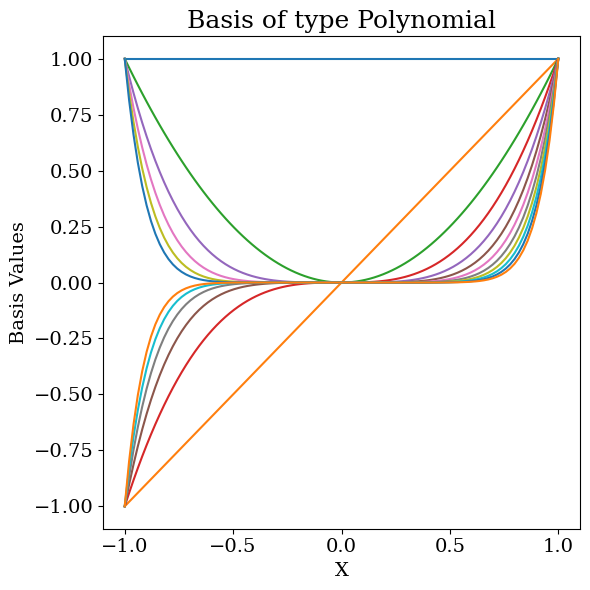

In [74]:
"""
Perform a test on the developed modules
"""
xtrain=np.linspace(-1, 1, 100)
polybasis = PolyTransformer(degree=11).transform(xtrain)
plot_basis(xtrain, polybasis, 'Polynomial')